### Подключение модулей

In [341]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV

In [262]:
%matplotlib inline

### Загрузка данных

In [263]:
df = pd.read_csv("credit_score_train.csv", low_memory=False)

In [264]:
df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [266]:
df.shape

(100000, 28)

##### Размер набора данных: 100,000 наблюдений, 28 признаков

In [267]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [268]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


### Описание данных

##### Признаки:
- **ID** – уникальный идентификатор пользователя
- **Customer_ID** - уникальный идентификатор клиента
- **Month** - месяц кредита
- **Name** - Имя и фамилия клиента
- **Age** - Возраст клиента
- **SSN** - Номер соц. страхования клиента
- **Occupation** - Должность клиента
- **Annual_Income** - Ежегодный доход клиента
- **Monthly_Inhand_Salary** - Ежемесячная зарплата клиента
- **Num_Bank_Accounts** - Количество банковских счётов у клиента
- **Num_Credit_Card** - Количество кредитных карточек у клиента
- **Interest_Rate** - Процетная ставка кредита
- **Num_of_Loan** - Количество кредитов у клиента
- **Type_of_Loan** - Тип кредита
- **Delay_from_due_date** - Задержка оплаты кредита
- **Num_of_Delayed_Payment** - Количество задержанных платежей
- **Changed_Credit_Limit** - Корректировка кредитного лимита клиента.
- **Num_Credit_Inquiries** - Количество кредитных запросов
- **Credit_Mix** - Различные виды кредитов, которыми пользуется клиент.
- **Outstanding_Debt** - Сколько выплачено клиентом
- **Credit_Utilization_Ratio** - Коэффициент использования кредитов
- **Credit_History_Age** - Возраст кредитной истории
- **Payment_of_Min_Amount** - Указывает, платит ли клиент минимально необходимую сумму каждый месяц.
- **Total_EMI_per_month** - Общий эквивалентный ежемесячный платеж (EMI), выплаченный клиентом.
- **Amount_invested_monthly** - Ежемесячная сумма инвестиций, сделанных клиентом.
- **Payment_Behaviour** - Платёжные привычки клиента.
- **Monthly_Balance** - Остаток на счете клиента в конце каждого месяца.
- **Credit_Score** - Кредитные рейтинг клиента

In [269]:
df.info(max_cols=30, verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [270]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,100000,100000,0x1602,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_ID,100000,12500,CUS_0xd40,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,100000,8,January,12500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,90015,10139,Langep,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,100000,1788,38,2833,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SSN,100000,12501,#F%$D@*&8,5572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,100000,16,_______,7062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Income,100000,18940,36585.12,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Monthly_Inhand_Salary,84998.0,NaN,NaN,NaN,4194.17085,3183.686167,303.645417,1625.568229,3093.745,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,NaN,NaN,NaN,17.09128,117.404834,-1.0,3.0,6.0,7.0,1798.0


##### Вывод

Поля, в которых есть пропущенные значения: Name, Monthly_Inhand_Salary, Type_of_Loan, Num_of_Delayed_Payment, Num_Credit_Inquiries, Credit_History_Age, Amount_invested_monthly и Monthly_Balance.

Поля, в которых есть некорректные значения: Age, SSN, Annual_Income, Num_Credit_Card, Interest_Rate, Num_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Outstanding_Debt и Amount_invested_monthly.

In [271]:
df.duplicated().sum()

0

In [272]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

### Исправление данных в датасете

In [273]:
# Очистка столбца Age
df["Age"] = df["Age"].str.replace(r"[_\s-]", "", regex = True)

In [274]:
# Изменение типа данных в столбце Age
df = df.astype({'Age': 'int32'})

In [275]:
# Исправление неправильных данных
def age(age):
    if age > 120:
        return df["Age"].median()
    if age < 0:
        Age = abs(age)
        if Age > 120:
            return df["Age"].median()
        else:
            return Age
    return age

df["Age"] = df["Age"].apply(age)

In [276]:
# Заполнение пустых данных
df["Age"] = df["Age"].fillna(df["Age"].median())

In [277]:
# Удаление неправильных данных
df["SSN"] = df["SSN"].str.replace(r"^#F%\$D@\*&8", "Unknown", regex = True)

In [278]:
# Очистка столбца Annual_Income
df["Annual_Income"] = df["Annual_Income"].str.replace(r"[_\s-]", "", regex = True)

In [279]:
# Изменение типа данных в столбце Annual_Income
df = df.astype({'Annual_Income': 'float32'})

In [280]:
# Исправление неправильных данных
def bank_accounts(accounts):
    if accounts > 12:
        return df["Num_Bank_Accounts"].median()
    if accounts < 0:
        Accounts = abs(accounts)
        if Accounts > 12:
            return df["Num_Bank_Accounts"].median()
        else:
            return Accounts
    return accounts

df["Num_Bank_Accounts"] = df["Num_Bank_Accounts"].apply(bank_accounts)

In [281]:
# Исправление неправильных данных
def credit_cards(cards):
    if cards > 12:
        return df["Num_Credit_Card"].median()
    if cards < 0:
        Cards = abs(cards)
        if Cards > 12:
            return df["Num_Credit_Card"].median()
        else:
            return Cards
    return cards

df["Num_Credit_Card"] = df["Num_Credit_Card"].apply(credit_cards)

In [282]:
# Изменение типа данных в столбце Num_Credit_Card
df = df.astype({'Num_Credit_Card': 'int32'})

In [283]:
# Исправление неправильных данных
def interest_rate(rate):
    if rate > 50:
        return df["Interest_Rate"].median()
    if rate < 0:
        Rate = abs(rate)
        if Rate > 50:
            return df["Interest_Rate"].median()
        else:
            return Rate
    return rate

df["Interest_Rate"] = df["Interest_Rate"].apply(interest_rate)

In [284]:
# Очистка поля
df["Num_of_Loan"] = df["Num_of_Loan"].str.replace(r"[_\s-]", "0", regex = True)

In [285]:

# Изменение типа данных в столбце Num_of_Loan
df = df.astype({'Num_of_Loan': 'int32'})

In [286]:
# Исправление неправильных данных
def num_of_loan(rate):
    if rate > 10:
        return df["Num_of_Loan"].median()
    if rate < 0:
        Rate = abs(rate)
        if Rate > 10:
            return df["Num_of_Loan"].median()
        else:
            return Rate
    return rate

df["Num_of_Loan"] = df["Num_of_Loan"].apply(num_of_loan)

In [287]:
# Исправление неправильных данных
def inquiries(rate):
    if rate > 10:
        return df["Num_Credit_Inquiries"].median()
    if rate < 0:
        Rate = abs(rate)
        if Rate > 10:
            return df["Num_Credit_Inquiries"].median()
        else:
            return Rate
    return rate

df["Num_Credit_Inquiries"] = df["Num_Credit_Inquiries"].apply(inquiries)

In [288]:
# Исправление неправильных данных
def delay(days):
    if days < 0:
        return abs(days)
    return days

df["Delay_from_due_date"] = df["Delay_from_due_date"].apply(delay)

In [289]:
# Исправление неправильных данных

def delay(days):
    if days < 0:
        return abs(days)
    return days

df["Delay_from_due_date"] = df["Delay_from_due_date"].apply(delay)

In [309]:
df["Monthly_Balance"].fillna(df["Monthly_Balance"].median(), inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_21808\740013184.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Monthly_Balance"].fillna(df["Monthly_Balance"].median(), inplace=True)


In [290]:
# Заполнение пустых данных

df["Name"] = df["Name"].fillna("-", inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_21808\629429917.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Name"] = df["Name"].fillna("-", inplace=True)


In [291]:
# Заполнение пустых данных

df["Type_of_Loan"] = df["Type_of_Loan"].fillna("-")

In [292]:
# Заполнение пустых данных

df["Monthly_Inhand_Salary"] = df["Monthly_Inhand_Salary"].fillna(df["Monthly_Inhand_Salary"].median())

In [293]:
# Заполнение пустых данных

df["Num_of_Loan"].fillna(0, inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_21808\488563547.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Num_of_Loan"].fillna(0, inplace=True)


In [294]:
df["Num_Credit_Inquiries"].fillna(0, inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_21808\4209515544.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Num_Credit_Inquiries"].fillna(0, inplace=True)


In [295]:
numeric_columns = ['Age', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 
                   'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 
                   'Delay_from_due_date', 'Num_of_Delayed_Payment', 
                   'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 
                   'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 
                   'Monthly_Balance']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [296]:
# Удаление строк, где "Num_of_Delayed_Payment" пустое

df.dropna(subset=["Num_of_Delayed_Payment"], inplace=True)

In [297]:
# Заполнение пустых данных


df["Changed_Credit_Limit"].fillna(0, inplace=True)
df = df.loc[df['Changed_Credit_Limit'] > 0]

C:\Users\admin\AppData\Local\Temp\ipykernel_21808\4264852884.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Changed_Credit_Limit"].fillna(0, inplace=True)


In [298]:
# Заполнение пустых данных

df["Outstanding_Debt"] = df["Outstanding_Debt"].fillna(0)

In [299]:
# Заполнение пустых данных

df["Credit_History_Age"] = df["Credit_History_Age"].fillna(df["Credit_History_Age"].mode()[0])

In [300]:
# Заполнение пустых данных

df["Amount_invested_monthly"] = df["Amount_invested_monthly"].fillna(df["Amount_invested_monthly"].mode()[0])

In [301]:
# Исправление неправильных данных

df["Occupation"] = df["Occupation"].replace("_______", "No Occupation")

In [302]:
# Исправление неправильных данных

df["Payment_Behaviour"] = df["Payment_Behaviour"].replace("!@9#%8", "Unknown")

### Визуализация

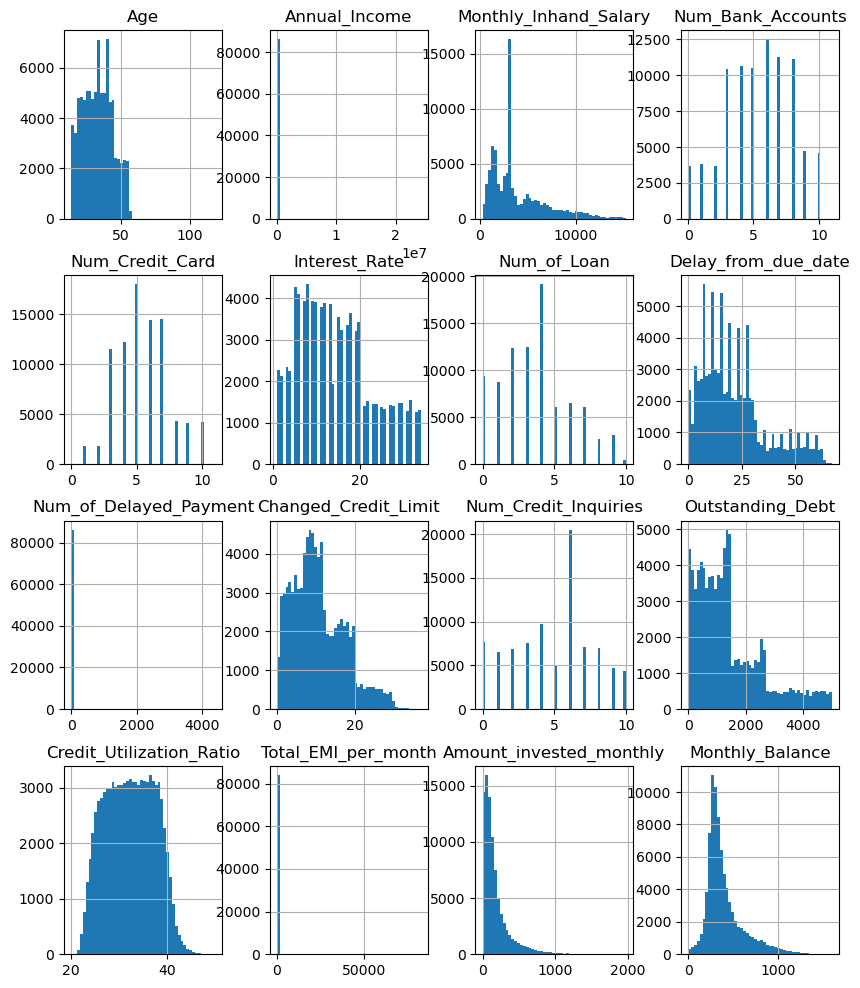

In [303]:
df.hist(figsize = (10, 12), bins = 50);
plt.show()

In [ ]:
sns.heatmap(df[numeric_columns], annot=True)
plt.title('Heatmap')
plt.show()

##### Создание дата сета для моделей

In [ ]:
Credit_Score_cols = pd.get_dummies(df["Credit_Score"], dtype = int)

X = pd.concat([df[numeric_columns], Credit_Score_cols], axis = 1)
y = df["Credit_Score"]

In [311]:
X = pd.concat([df[numeric_columns]], axis=1)
X.shape

(86922, 15)

In [306]:
X

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,23.0,1824.843333,3.0,4,3.0,4.0,3,7.0,11.27,4.0,809.98,26.822620,49.574949,80.415295,312.494089
3,23.0,3093.745000,3.0,4,3.0,4.0,5,4.0,6.27,4.0,809.98,31.377862,49.574949,199.458074,223.451310
5,23.0,3093.745000,3.0,4,3.0,4.0,8,4.0,9.27,4.0,809.98,27.262259,49.574949,62.430172,340.479212
7,23.0,1824.843333,3.0,4,3.0,4.0,3,6.0,11.27,4.0,809.98,23.933795,49.574949,24.785217,358.124168
8,28.0,3037.986667,2.0,4,6.0,1.0,3,4.0,5.42,2.0,605.03,24.464031,18.816215,104.291825,470.690627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25.0,3359.415833,4.0,6,7.0,2.0,20,6.0,9.50,3.0,502.38,39.323569,35.104023,140.581403,410.256158
99995,25.0,3359.415833,4.0,6,7.0,2.0,23,7.0,11.50,3.0,502.38,34.663572,35.104023,60.971333,479.866228
99996,25.0,3359.415833,4.0,6,7.0,2.0,18,7.0,11.50,3.0,502.38,40.565631,35.104023,54.185950,496.651610
99997,25.0,3359.415833,4.0,6,13.0,2.0,27,6.0,11.50,3.0,502.38,41.255522,35.104023,24.028477,516.809083


In [307]:
credit_score_mapping = {'Standard': 1, 'Poor': 2, 'Good': 3}

##### KNeighboursClassifier

In [312]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

(58237, 15) (28685, 15) (58237,) (28685,)


KNeighborsClassifier()

In [313]:
knn_predict = knn.predict(X_test)

In [314]:
knn_accuracy = accuracy_score(knn_predict, y_test)
knn_accuracy

0.6102143977688688

In [315]:
confusion_matrix(knn_predict, y_test)

array([[ 1935,   499,  2179],
       [  347,  5181,  2659],
       [ 2869,  2628, 10388]], dtype=int64)

In [316]:
knn.predict(X_test)

array(['Standard', 'Poor', 'Poor', ..., 'Standard', 'Good', 'Standard'],
      dtype=object)

In [317]:
print(classification_report(knn_predict, y_test))

              precision    recall  f1-score   support

        Good       0.38      0.42      0.40      4613
        Poor       0.62      0.63      0.63      8187
    Standard       0.68      0.65      0.67     15885

    accuracy                           0.61     28685
   macro avg       0.56      0.57      0.56     28685
weighted avg       0.62      0.61      0.61     28685



In [318]:
knn_pred_test = knn.predict(X_test)
display(knn_pred_test[:20], np.array(y_test[:20]))

array(['Standard', 'Poor', 'Poor', 'Standard', 'Standard', 'Poor',
       'Standard', 'Good', 'Standard', 'Standard', 'Good', 'Standard',
       'Standard', 'Poor', 'Standard', 'Good', 'Standard', 'Standard',
       'Standard', 'Standard'], dtype=object)

array(['Standard', 'Poor', 'Standard', 'Standard', 'Poor', 'Standard',
       'Standard', 'Standard', 'Standard', 'Standard', 'Good', 'Standard',
       'Standard', 'Poor', 'Standard', 'Standard', 'Standard', 'Standard',
       'Poor', 'Standard'], dtype=object)

In [319]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

train accuracy:  0.7441317375551625
test accuracy:  0.6102143977688688


In [320]:
knn_accuracy = accuracy_score(y_test, y_test_predict, normalize=True)

### Байесовский наивный классификатор

In [321]:
gnb = GaussianNB()
gnb.fit(X, y)

GaussianNB()

In [322]:
gnb_pred_test = gnb.predict(X_test)
display(gnb_pred_test[:20], np.array(y_test[:20]))

array(['Poor', 'Poor', 'Poor', 'Good', 'Good', 'Standard', 'Standard',
       'Good', 'Good', 'Good', 'Good', 'Standard', 'Poor', 'Poor', 'Good',
       'Standard', 'Standard', 'Poor', 'Poor', 'Standard'], dtype='<U8')

array(['Standard', 'Poor', 'Standard', 'Standard', 'Poor', 'Standard',
       'Standard', 'Standard', 'Standard', 'Standard', 'Good', 'Standard',
       'Standard', 'Poor', 'Standard', 'Standard', 'Standard', 'Standard',
       'Poor', 'Standard'], dtype=object)

In [323]:
accuracy_score(y_test, gnb_pred_test)

0.5967230259717623

In [324]:
gnb_accuracy = accuracy_score(y_test, gnb_pred_test)

### Random Forest Classifier

In [325]:
rfc  = RandomForestClassifier(criterion = 'gini',
                                    n_estimators = 100,
                                    max_depth = 9,
                                    random_state = 42,
                                    n_jobs = -1)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [326]:
rfc_pred_test = rfc.predict(X_test)
display(rfc_pred_test[:20], np.array(y_test[:20]))

array(['Standard', 'Poor', 'Standard', 'Good', 'Poor', 'Poor', 'Standard',
       'Standard', 'Good', 'Standard', 'Standard', 'Standard', 'Poor',
       'Poor', 'Standard', 'Standard', 'Standard', 'Standard', 'Poor',
       'Standard'], dtype=object)

array(['Standard', 'Poor', 'Standard', 'Standard', 'Poor', 'Standard',
       'Standard', 'Standard', 'Standard', 'Standard', 'Good', 'Standard',
       'Standard', 'Poor', 'Standard', 'Standard', 'Standard', 'Standard',
       'Poor', 'Standard'], dtype=object)

In [327]:
rfc_accuracy = accuracy_score(y_test, rfc_pred_test)

### Logistic Regression

In [328]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [329]:
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [330]:
lr_pred_test = lr.predict(X_test)
display(lr_pred_test[:20], np.array(y_test[:20]))

array(['Standard', 'Poor', 'Poor', 'Standard', 'Standard', 'Standard',
       'Standard', 'Good', 'Good', 'Standard', 'Standard', 'Standard',
       'Poor', 'Poor', 'Standard', 'Standard', 'Standard', 'Standard',
       'Poor', 'Standard'], dtype=object)

array(['Standard', 'Poor', 'Standard', 'Standard', 'Poor', 'Standard',
       'Standard', 'Standard', 'Standard', 'Standard', 'Good', 'Standard',
       'Standard', 'Poor', 'Standard', 'Standard', 'Standard', 'Standard',
       'Poor', 'Standard'], dtype=object)

In [331]:
accuracy_score(y_test, lr_pred_test)

0.6334669687990239

In [332]:
lr_accuracy = accuracy_score(y_test, lr_pred_test)

In [333]:
classifiers =["KNeighborsClassifier", "Gaussian Naive Bayes", "Random Forest Classifier", "Logistic Regression"]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [knn_accuracy, gnb_accuracy, rfc_accuracy, lr_accuracy]

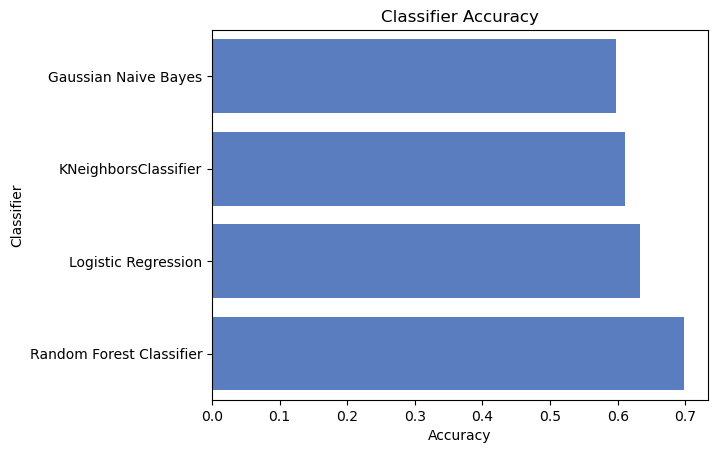

In [334]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b");
plt.show()

In [335]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Confusion Matrix

In [337]:
cm = confusion_matrix(y_test, y_test_predict)

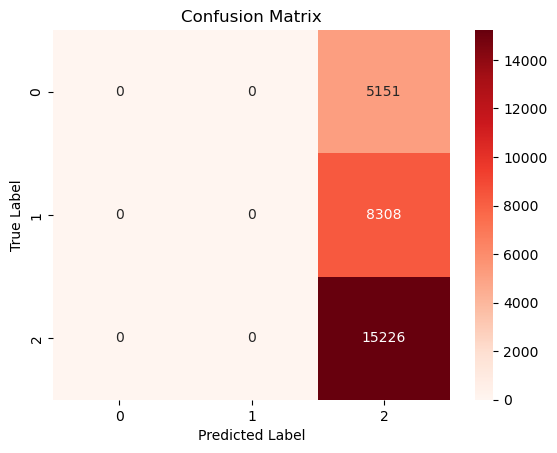

In [338]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

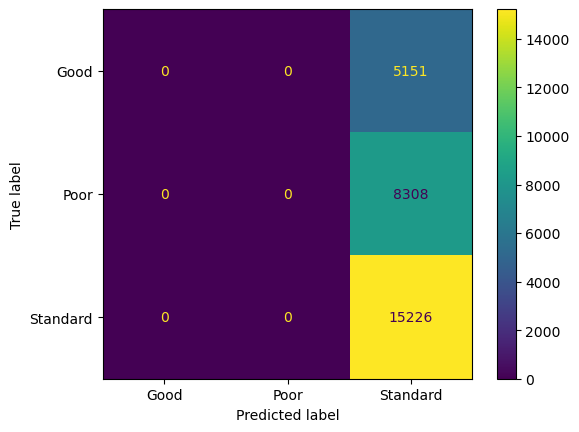

In [342]:
cm = confusion_matrix(y_test, y_test_predict, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=knn.classes_)
disp.plot()
plt.show()

In [343]:
print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

train accuracy:  0.5339560760341364
test accuracy:  0.5308000697228517


### Вывод
##### Данный датасет имел большое количество неправильных а так же пропущенных значений, которые мы чинили. Самой точной моделью оказалась Random Forest Classifier.